<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


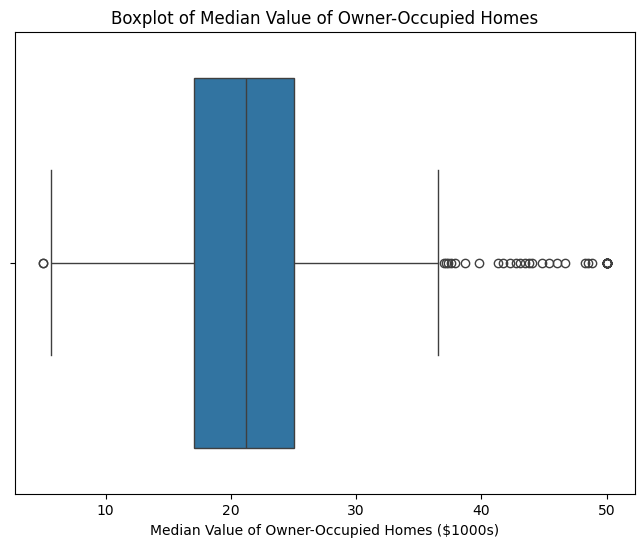

In [10]:
# Task 2: Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
sns.boxplot(x='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

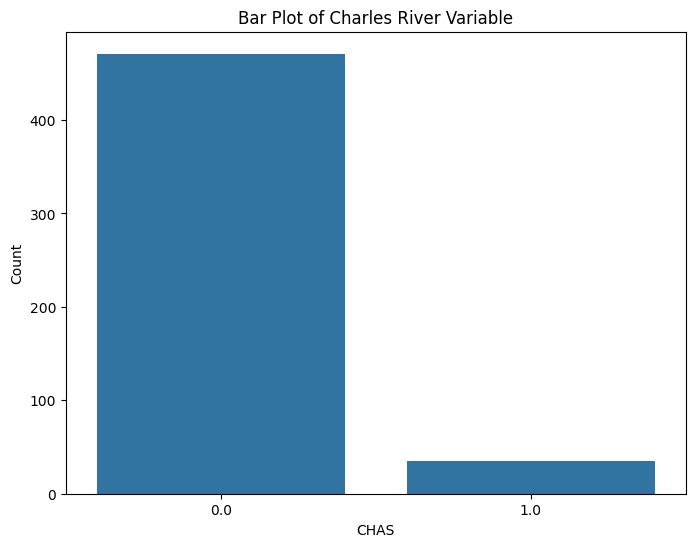

In [11]:
# Task 2: Bar plot for the Charles river variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()

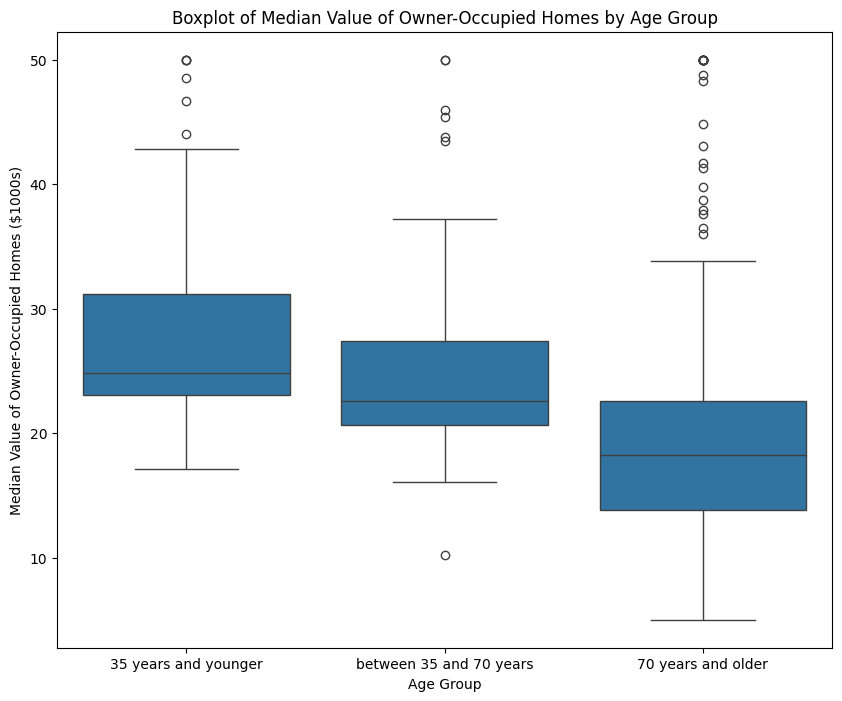

In [16]:
#Boxplot for MEDV variable vs AGE variable
# Discretizing the AGE variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.figure(figsize=(10, 8))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

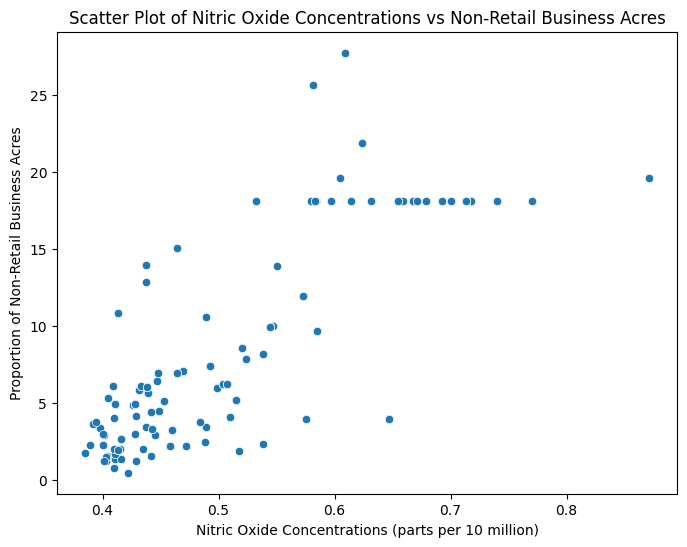

In [19]:
# Task 2: Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()



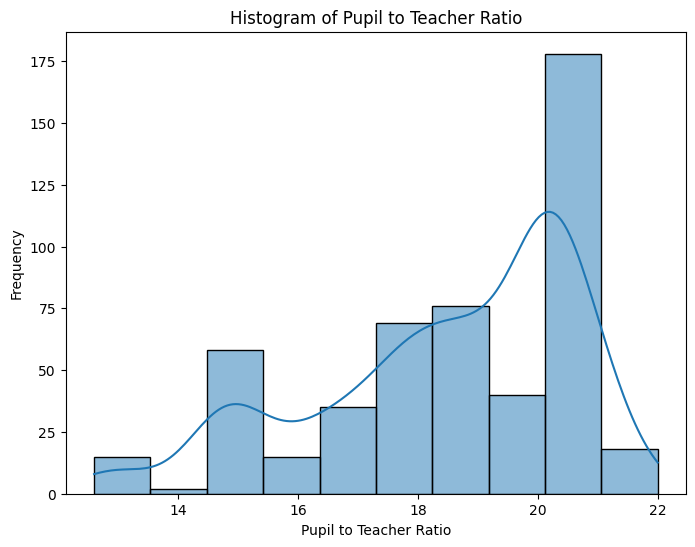

In [20]:
# Task 2: Histogram for pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Task 3 - Hypothesis Testing

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Hypotheses:
# Null Hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.
# Alternative Hypothesis (H1): There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.

charles_river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
charles_river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = scipy.stats.ttest_ind(charles_river_yes, charles_river_no)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.")




T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject Null Hypothesis: There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.


In [27]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Hypotheses:
# Null Hypothesis (H0): There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.
# Alternative Hypothesis (H1): There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

anova_result = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject Null Hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject Null Hypothesis: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject Null Hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.


In [29]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Hypotheses:
# Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
# Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject Null Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [31]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Hypotheses:
# Null Hypothesis (H0): Weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.
# Alternative Hypothesis (H1): Weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.

# Fit regression model
X = boston_df['DIS']  # Independent variable
y = boston_df['MEDV']  # Dependent variable

X = sm.add_constant(X)  # Adding a constant term to the predictor
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression

# Get the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        18:56:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [32]:
# Check for significance of coefficient
print("Impact of Weighted Distance on Median Value of Homes:")
print("Coefficient:", model.params['DIS'])
print("P-value:", model.pvalues['DIS'])

if model.pvalues['DIS'] < alpha:
    print("Reject Null Hypothesis: Weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.")
else:
    print("Fail to reject Null Hypothesis: Weighted distance to the five Boston employment centres has no impact")

Impact of Weighted Distance on Median Value of Homes:
Coefficient: 1.091613015841107
P-value: 1.2066117273372235e-08
Reject Null Hypothesis: Weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.
